Success: E:\University\Semster 5\AI Lab\venv\datasets mil gaya!
Training Data:
Found 800 images belonging to 2 classes.
Validation Data:
Found 200 images belonging to 2 classes.


e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 948ms/step - accuracy: 0.5950 - loss: 0.7181 - val_accuracy: 0.6050 - val_loss: 0.6204
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 583ms/step - accuracy: 0.7850 - loss: 0.4773 - val_accuracy: 0.8050 - val_loss: 0.4124
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 574ms/step - accuracy: 0.8575 - loss: 0.3455 - val_accuracy: 0.8550 - val_loss: 0.3293
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 570ms/step - accuracy: 0.9212 - loss: 0.2034 - val_accuracy: 0.9200 - val_loss: 0.2344
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 576ms/step - accuracy: 0.9500 - loss: 0.1354 - val_accuracy: 0.9400 - val_loss: 0.1733
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 579ms/step - accuracy: 0.9712 - loss: 0.0967 - val_accuracy: 0.9450 - val_loss: 0.1535
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - accuracy: 0.9837 - loss: 0.0552 - val_accuracy: 0.9800 - val_loss: 0.0634
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 679ms/step - accuracy: 0.9875 - loss: 0.0412 - val_accu

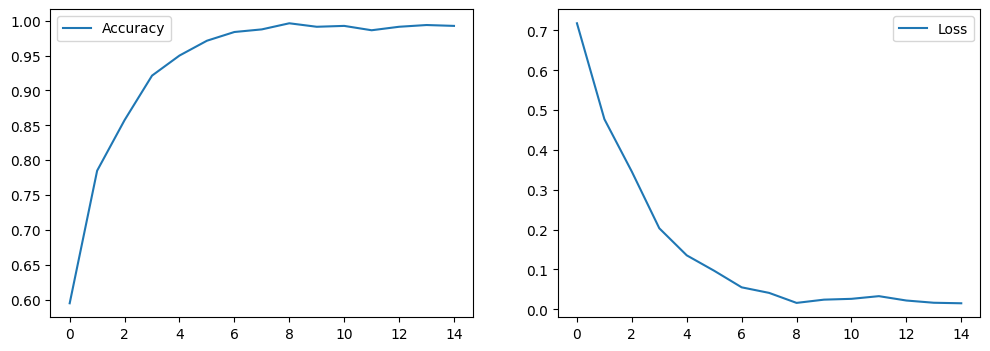

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step


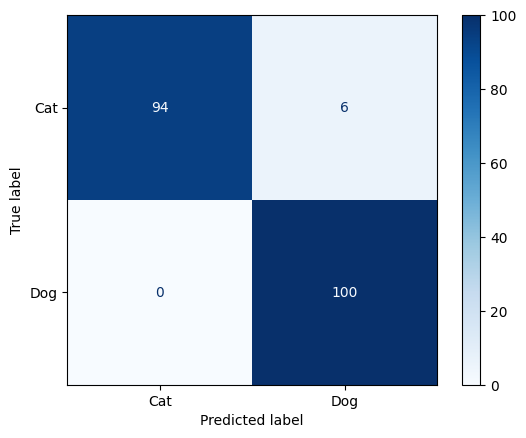

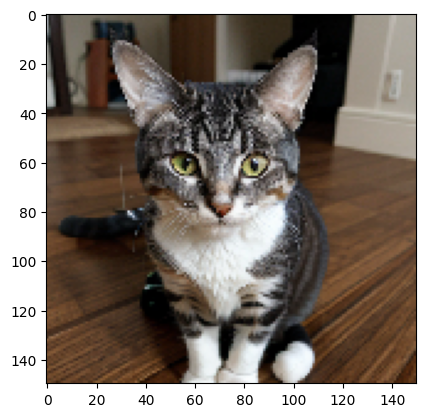

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Prediction: CAT


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# -----------------------
# 1. Updated Path (venv/datasets)
# -----------------------
dataset_path = r"E:\University\Semster 5\AI Lab\venv\datasets"

# Image parameters
img_width, img_height = 150, 150
batch_size = 32

# Verification: Run hone se pehle check karein
if not os.path.exists(dataset_path):
    print(f"ALARM: Folder nahi mila! Please check: {dataset_path}")
else:
    print(f"Success: {dataset_path} mil gaya!")

# -----------------------
# 2. Data preprocessing
# -----------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

print("Training Data:")
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

print("Validation Data:")
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# -----------------------
# 3. Model Architecture
# -----------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------
# 4. Training
# -----------------------
if train_generator.samples > 0:
    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator
    )

    # Plots
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1); plt.plot(history.history['accuracy'], label='Accuracy'); plt.legend()
    plt.subplot(1,2,2); plt.plot(history.history['loss'], label='Loss'); plt.legend()
    plt.show()

    # Confusion Matrix
    y_pred = (model.predict(validation_generator) > 0.5).astype(int)
    cm = confusion_matrix(validation_generator.classes, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=['Cat', 'Dog']).plot(cmap='Blues')
    plt.show()
else:
    print("Error: Images nahi mili. Folder check karein ke usme 'cats' aur 'dogs' ke sub-folders hain ya nahi.")

# -----------------------
# 5. Quick Test (Single Image)
# -----------------------
# Is path ko apni kisi pic ke naam se update kar lein check karne ke liye
sample_img = os.path.join(dataset_path, "cats", os.listdir(os.path.join(dataset_path, "cats"))[0])
img = load_img(sample_img, target_size=(150, 150))
plt.imshow(img); plt.show()
img_array = img_to_array(img)/255.0
pred = model.predict(np.expand_dims(img_array, axis=0))
print("Prediction:", "DOG" if pred > 0.5 else "CAT")